## Introduction To PyBrain

This is a tutorial to introduce basic knowledge of Pybrain and follow that by implementing rudimentary neural networks to solve simple classification problems. While neural networks generally takes a while to understand, this tutorial provides an simple and fast way to experience some of the capabilities neural networks have. PyBrain is short for **Py**thon-**B**ased **R**einforcement Learning, **A**rtificial **I**ntelligence and **N**eural Network Library. Though no longer actively developed, PyBrain is simpler than PyLearn and other packages out there since the library features perceptron as well as neural networks. 

### Table of Contents
- [Required Packages](#Required-Packages)
- [Understanding Our Dataset](#Understanding-Our-Dataset)
- [Getting Data In](#Getting-Data-In)
- [Creating the Neural Network](#Creating-the-Neural-Network)
- [Summary and Further Resources](#Summary-and-Further-Resources)



## Required Packages

- PyBrain
- Numpy
- Matplotlib
- Scikit-Learn

Before getting started, you'll need to install the various libraries that we will be using. You can install all of the required pacakges through `pip`:

     > pip install --upgrade pybrain
     > pip install --upgrade numpy
     > pip install --upgrade pandas
     > pip install --upgrade matplotlib
     > pip install --upgrade scikit-learn
    



In [1]:
import pybrain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Understanding Our Dataset

The Iris flower data set also known as Fisher's Iris data set is a data set created by Ronald Fisher in 1936. The data set contains 50 samples from three species of Iris flower. For each sample, four features were used to measure the flower: length and width of the sepals and petals (cm). To understand our data better, let's take a look into the Iris flower data set included in Scikit-Learn.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Print first 5 samples of the data set
print ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
print X[:5] 

# Print dimensions of the data set
print ["Rows", "Cols"]
print X.shape

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
['Rows', 'Cols']
(150, 4)


Stored in our variable ```X```, we have our data, where each row was a sample and the columns' indices being Sepal Length, Sepal Width, Petal Length and Petal Width. Here we see the first 5 samples in the data set. The entire data set has 150 samples, with 4 features per sample. 

In [4]:
# Print target results
print y.tolist()
yList = y.tolist()

# List of unique elements
print np.unique(y)

# Counts of each type of Iris
print "Count of Iris setosa: " + str(yList.count(0))
print "Count of Iris versicolor: " + str(yList.count(1))
print "Count of Iris virginica: " + str(yList.count(2))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 1 2]
Count of Iris setosa: 50
Count of Iris versicolor: 50
Count of Iris virginica: 50


Our particular data set includes only three types of irises shown in ```y``` as values from 0 to 2 representing a particular type. The type of irises include: Iris setosa, Iris versicolor, and Iris virginica. In our data set we have 50 samples of each type of Iris.

To understand what each flower type's characteristics are like, we can do some exploratory data analysis on our data. Let's first split our data set into separate lists based on its type.

Iris setosa Statistics (Blue)
       Sepal Length  Sepal Width  Petal Length  Petal Width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Iris versicolor Statistics (Green)
       Sepal Length  Sepal Width  Petal Length  Petal Width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000  

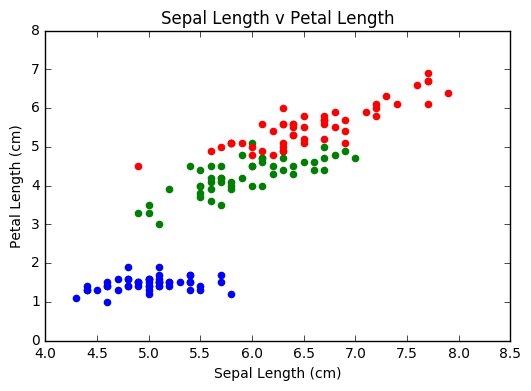

In [5]:
# Split iris.data to 3 lists of length 50
listOfIrises = np.split(X, 3)

# Load the data into Panda DataFrames
IrisOne = pd.DataFrame(listOfIrises[0], 
                       columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], 
                       index=range(50))

IrisTwo = pd.DataFrame(listOfIrises[1], 
                       columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], 
                       index=range(50))

IrisThree = pd.DataFrame(listOfIrises[2], 
                       columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], 
                       index=range(50))

# Retrieve sepal length and petal length
sepalLengthOne = IrisOne['Sepal Length'].values
sepalLengthTwo = IrisTwo['Sepal Length'].values
sepalLengthThree = IrisThree['Sepal Length'].values

petalLengthOne = IrisOne['Petal Length'].values
petalLengthTwo = IrisTwo['Petal Length'].values
petalLengthThree = IrisThree['Petal Length'].values

sepalWidthOne = IrisOne['Sepal Width'].values
sepalWidthTwo = IrisTwo['Sepal Width'].values
sepalWidthThree = IrisThree['Sepal Width'].values

petalWidthOne = IrisOne['Petal Width'].values
petalWidthTwo = IrisTwo['Petal Width'].values
petalWidthThree = IrisThree['Petal Width'].values


print("Iris setosa Statistics (Blue)")
print(IrisOne.describe())
print
print("Iris versicolor Statistics (Green)")
print(IrisTwo.describe())
print
print("Iris virginica Statistics (Red)")
print(IrisThree.describe())
print

#############
## PLOT #1 ##
#############

_, ax = plt.subplots()

# Plot points in scatter plot
ax.scatter(sepalLengthOne.tolist(), petalLengthOne.tolist(), color='blue')
ax.scatter(sepalLengthTwo.tolist(), petalLengthTwo.tolist(), color='green')
ax.scatter(sepalLengthThree.tolist(), petalLengthThree.tolist(), color='red')

# Set x and y labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_title('Sepal Length v Petal Length')

plt.show()


By plotting sepal length on the x-axis and petal length on the y-axis, we can see noticeable differences in the types of Iris flower. 

The blue-labeled Irises have a mean petal length of 1.46 while the mean petal lengths of green and red labeled Irises each have values of 4.26 and 5.55 respectively. We can also see a difference in the range of sepal lengths of the blue compared to red and green, where blue has a range of (4.3, 5.8) while red and green have (4.9, 7.0) and (4.9, 7.9) respectively. 

Now let's plot sepal width with petal width and analyze the scatter plot.


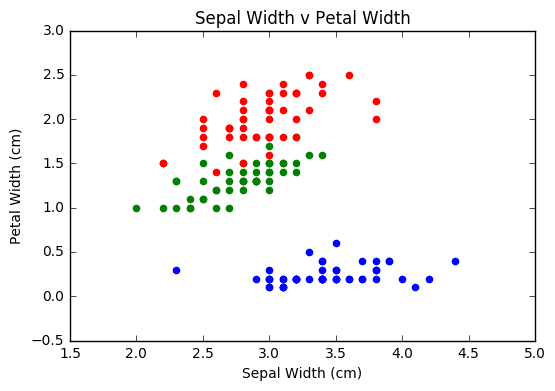

In [6]:
#############
## PLOT #2 ##
#############

import matplotlib.pyplot as plt
 
_ , ax2 = plt.subplots()

# Plot points in scatter plot
ax2.scatter(sepalWidthOne.tolist(), petalWidthOne.tolist(), color='blue')
ax2.scatter(sepalWidthTwo.tolist(), petalWidthTwo.tolist(), color='green')
ax2.scatter(sepalWidthThree.tolist(), petalWidthThree.tolist(), color='red')

# Set x and y labels
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Sepal Width v Petal Width')

plt.show()

By plotting sepal width on the x-axis and petal width on the y-axis, we can see noticeable differences in the types of Iris flower. 

Similar to the previous plot, we see a discrepancy of blue with red and green. Red in this plot seems to have a little bit more of a distance from green's scatter. The blue-labeled Irises have a mean petal width of 0.24 while the mean petal width of green and red labeled Irises each have values of 1.32 and 2.02 respectively.

Similar to how we would discriminate the differences that we see in these plots, a neural network would use similar logic to determine what to classify an input.

## Getting Data In

Let's first import the Python modules from Pybrain that we'll need for creating our neural network. 


In [7]:
from pybrain.datasets.classification import ClassificationDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.utilities import percentError
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer

Now that we have taken a look at the data, and we have imported the necessary components of our neural network, let's now load the data and specify the parameters for the target data.

In [26]:
# initialize empty data set
data = ClassificationDataSet(inp=4, nb_classes=3, 
                             class_labels=["Iris setosa", "Iris versicolor", "Iris virginica"])

# append data samples to the data set
for i in range(len(X)):
    data.addSample(X[i], y[i])

Here we instantiate our data set to take in our input. The parameter `inp` specifies the dimensionality of our input, which is 4 in our case the four features of the flower. The parameter `nb_classes` is used to explicitly state the number of target classes for our outputs. Lastly, the parameter `class_labels` is used to name the three classes we have targeted previously.

After initializing our empty data set, we input the data and target by row into the dataset. 

Common in training neural networks, we'll split our datasets in three: `training`, `validation`, and `testing` data.
- The `training` data is used to train our neural network, letting our algorithm adjust parameters based on the data.
- The `validation` data is used to eliminate which models paired with their parameters overfits the data. Here we are verifying that an increase in accuracy over the training data, will correspond to an increase in accuracy over data not shown to the neural network before (ie the validation data). Any decrease in accuracy means that we are overfitting to the data in our training dataset.
- The `testing` data is used for testing the final model to see the predictive power of the model (usually a float between 0, 1).

We can split the data using Pybrain's own function `splitWithProportion`. We will use the proportion of 70%, 15%, 15% respectively as recommended by sources like Mathworks:

In [27]:
# Split by 70% followed by 50%
training, rest = data.splitWithProportion(0.7)
validation, testing = rest.splitWithProportion(0.5)

# Check the ratios of our data sets
print "Data ratio:"
print len(training), ":", len(validation), ":", len(testing)

print 
print "Percentage training data:"
print 1.0*len(training)/len(data)

print "Percentage validation data:"
print 1.0*len(validation)/len(data)

print "Percentage testing data:"
print 1.0*len(testing)/len(data)

Data ratio:
105 : 22 : 23

Percentage training data:
0.7
Percentage validation data:
0.146666666667
Percentage testing data:
0.153333333333


Since we are doing a classification problem with neural networks, its best that we encode the classes using one output neuron per class. This is because we will eventually use a Softmaxlayer activation function to determine the class, which returns a binary output.

In [28]:
# Convert target data into a binary representation that is suitable for our classification problem
training._convertToOneOfMany()
validation._convertToOneOfMany()
testing._convertToOneOfMany()

Doing this converts the target classes into a list of three binary outputs, an encoding that is suitable for three neurons. 

In [29]:
# Take a look at the first 10 target outputs after the encoding
targets = training['target']

for i in range(10):
    print targets[i]

[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]


Lastly let's just check all of our data sets for the right dimensionalities. They should all have inputs of 4 dimensions, and outputs of 3 (the three classes we defined). Then let's check if we properly imported all the data from the iris data set into our blank data set.

In [30]:
print training.indim, training.outdim
print validation.indim, validation.outdim
print testing.indim, testing.outdim

print len(data['input']), len(data['target'])

4 3
4 3
4 3
150 150


Everything looks good, so lets move on!

## Creating the Neural Network

Finally reaching the part where we create the neural network, let's first define our neural network. In the code below, we instantiate our network to have 4 inputs, 3 hidden neurons, and 3 output neurons. 

Neurons are key structures in neural networks, that simulate how our brains work. They take in multiple binary inputs, $n_1, n_2, n_3, ...$ and produces a singular binary output. Our brains work in the same way because we choose to take in certain information when making decisions. To mimic even further how our brains work, there are weights associated to each input $w_1, w_2, w_3, ...$, similar to how we value certain information more than others. To create the binary output, the neuron would get a sum of the weighted inputs: $\sum{n_i w_i}$ and case on if it reached a certain total called the $threshold$ $value$. These neurons are the basic building blocks of the construction of neural networks.

Lastly, we use the outclass called a `SoftmaxLayer` because we are trying to solve a classification problem. The Softmax activation function used in the final layer of the network converts a vector and an index to a real value, in our case 0/1.

Next, we instantiate our backpropagation trainer. This trainer will run training data and calculates the gradient of a loss function for all the weights used in the network. Then the trainer will attempt to optimize the weights using the loss function gradient to minimize the loss function. To think about this, imagine the errors that occur in the later stages of the neural network and how they are closely related to the errors in the previous neurons. This trainer works backwards through the layers to optimize and minimize losses.

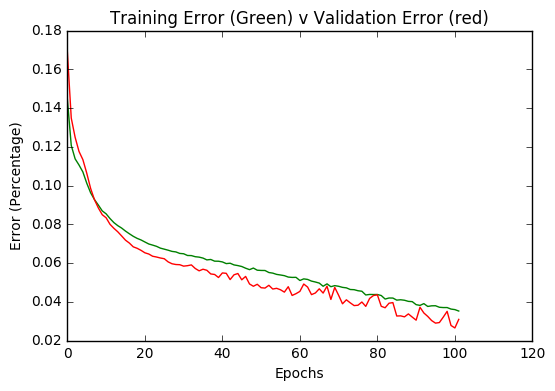

In [40]:
# Creating our neural network
neuralNet = buildNetwork(4, 3, 3, outclass=SoftmaxLayer)

# Creating our backpropagation Trainer
trainer = BackpropTrainer(neuralNet, dataset=training, momentum=0.1, verbose=False, weightdecay=0.01)

# Here we train our backpropagation trainer on our training data set for 100 cycles
trainingError, validationError = trainer.trainUntilConvergence(dataset=training, maxEpochs=100)

# Let's plot the error with the number of cycles the trainer has gone through
_ , ax3 = plt.subplots()
ax3.plot(trainingError, 'g', validationError, 'r')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Error (Percentage)')
ax3.set_title('Training Error (Green) v Validation Error (red)')

plt.show()

In the graph above, we can see the error percentage trend towards 0, which is a good sign because it mean we are getting better accuracy. In the graph above, we are only training the network for 100 epochs, which is equivalent to 100 cycles. Generally, the more cycles that one iterates through, the better accuracy one gets. Let's try that below by running the trainer on the training set for 500 cycles. You can also turned on verbosity, to see the percentage errors at each cycle. The final total error I had after 500 cycles hovered around 0.02. 

In [19]:
trainer.trainOnDataset(training, 500)

The reason why our percentage error at the end hovered around 0.02 and never went significantly below that level was because of our training data set. Imagine learning from only one textbook. At a certain point, you'll be saturated with information from the one textbook. However, since you only understand ideas from your textbook, when you find information from the web that you've never seen before, you can only get so much right. 

Lastly, let's take a look at the percent error our model has on the remaining part of the data set we never touched: the `testing` data. 

In [41]:
output = neuralNet.activateOnDataset(testing).argmax(axis=1)
percentError(output, testing['class'])

4.3478260869565215

From this part, I received 4.34% error, meaning that I have a 95.66% score for the test data! That's a really good start. However, we can do better. Think about the various parameters you inputted for creating the neural network, as well as the number of cycles for the Backpropagation trainer. Try it out with 6 hidden neurons and instead of running it for 500 cycles, do 1000. What differences do you see? 

A lot of machine learning and creating neural networks requires users to tweak and play around with the parameters. There's a balance of weighting certain parameters heavier than others that could cause the model to better predict the training set, but estimate poorly for unseen data. Thus, it is up to the user to decide what parameters to put in and to evaluate the outcomes.

## Summary and Further Resources

This tutorial highlighted just a few elements of what is possible to do with neural networks in Python.  Much more detail about the libraries and some other interesting projects you could try out are listed below:

1. PyBrain: http://pybrain.org/docs/
2. Sklearn: http://scikit-learn.org/stable/documentation.html
3. Iris Data Set: https://en.wikipedia.org/wiki/Iris_flower_data_set
4. Classifying faces (olivetti dataset): https://goo.gl/Z7Bnbb
5. Recognizing handwritten digits: https://goo.gl/N4fLal
6. Financial trading with neural nets: https://goo.gl/jiEfSq